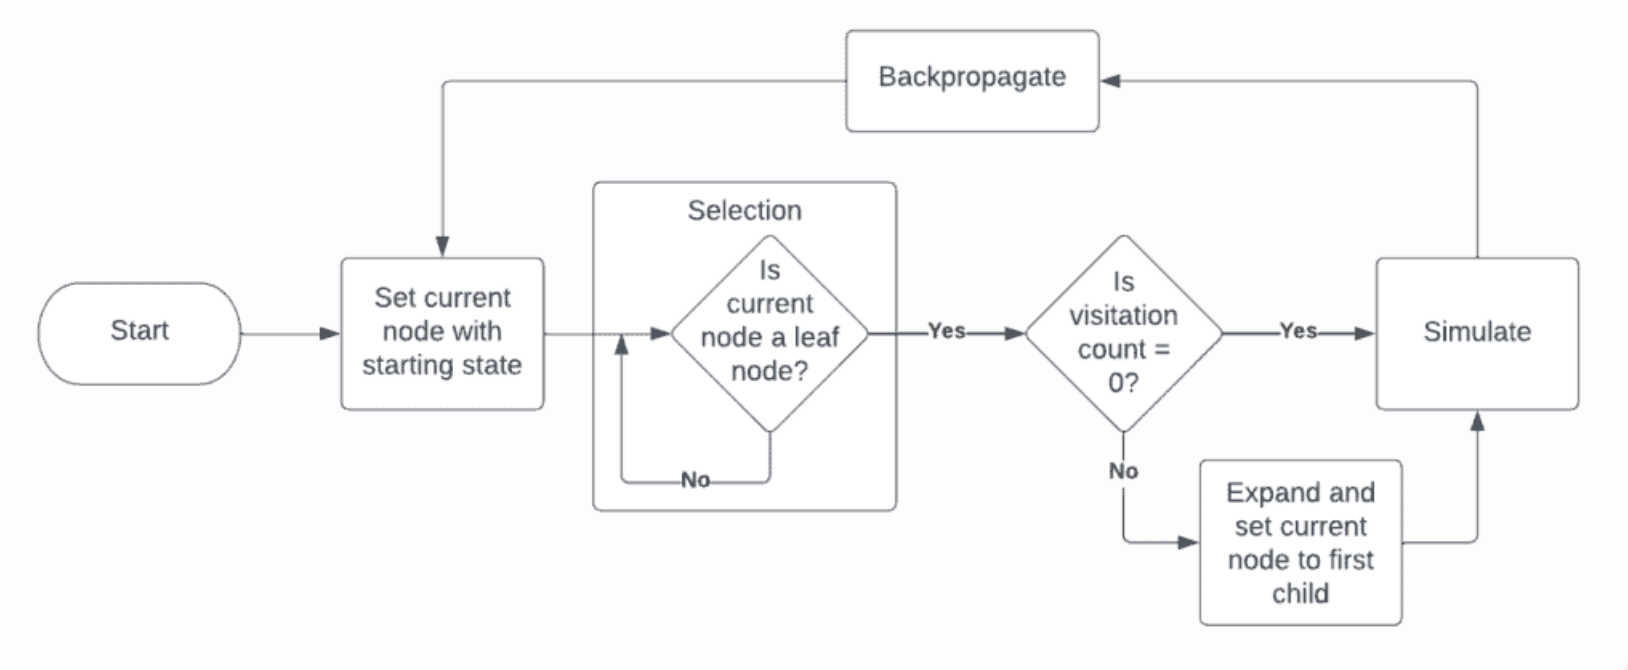
https://dilithjay.com/blog/monte-carlo-tree-search
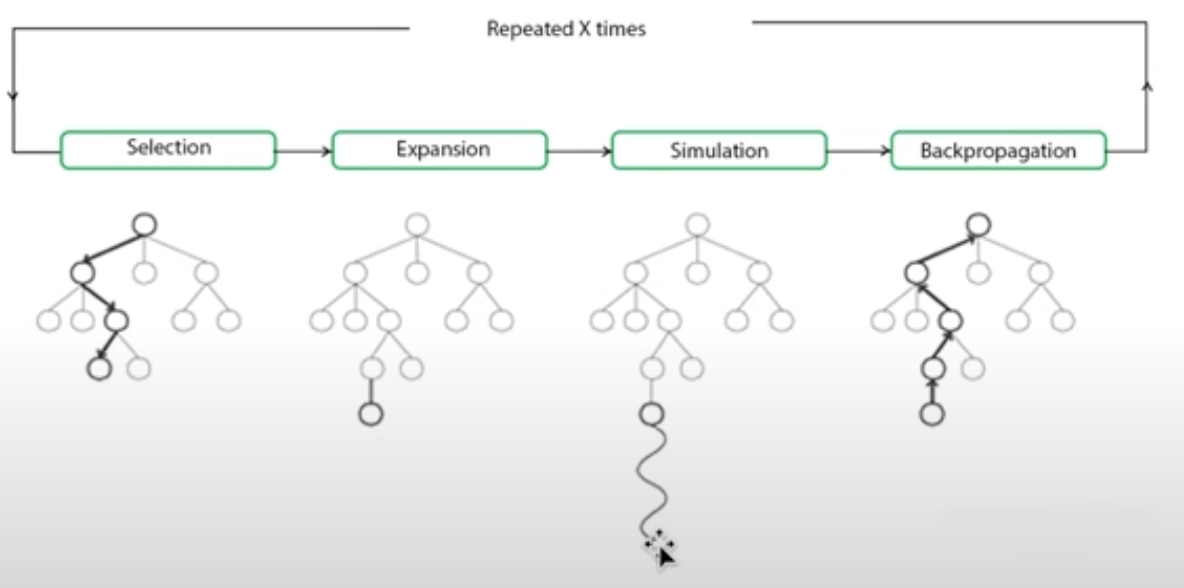
https://www.youtube.com/watch?v=UXW2yZndl7U

In [1]:
import random
import copy
import math
import graphviz
import matplotlib.pyplot as plt

from tictactoe import TicTacToe
from connecttwo import ConnectTwo


random.seed(0)

class MCTS:
    def __init__(self, state, max_iterations=1000):
        self.root = Node(state)
        self.max_iterations = max_iterations


class Node:
    def __init__(self, state, prev=None):
        self.prev = prev
        self.state = state
        self.nodes = []
        self.visits = 0
        self.wins = {"X": 0, "O": 0, None: 0}
        self.focus_player = "X"
        self.ucb1 = None

    def expand(self):
        if self.nodes == []:
            for move in self.state.valid_moves():
                new_state = copy.deepcopy(self.state)
                new_state.make_move(move)
                self.nodes.append(Node(new_state, self))

    def backpropagate(self, winner):
        self.visits += 1
        self.wins[winner] += 1
        if self.prev:
            self.prev.backpropagate(winner)

    def UCB1(self):
        if self.visits != 0:
            prev_visits = self.prev.visits if self.prev else self.visits
            return round(self.wins[self.focus_player] / self.visits + (2 * (math.log(prev_visits) / self.visits) ** 0.5), 4)
        return float("inf")

    def draw_tree(self, alpha_of="visits", max_alpha=None):
        if max_alpha is None:
            max_alpha = self.__dict__[alpha_of]
        alpha = self.__dict__[alpha_of] / max_alpha
        fillcolor = f"{int(255 * (1 - alpha)):02x}0000{int(255 * alpha):02x}"
        if dot is None:
            dot = graphviz.Digraph()
        dot.node(str(id(self.node)), str(self.node), fillcolor=fillcolor)
        for child in self.node.nodes:
            dot.edge(str(id(self.node)), str(id(child)))
            self.draw_tree(child, dot, max_alpha)
        return dot
    
    def print_tree(self, depth=0):
        print("  " * depth, depth, str(self))
        for child in self.nodes:
            child.print_tree(depth + 1)
    
    def __repr__(self) -> str:
        return f"Node({self.state}, {self.visits}, {self.wins}), {self.UCB1()}"
    
def draw_tree(node, dot=None, alpha_of="visits", max_alpha=None):
    if max_alpha is None:
        max_alpha = node.__dict__[alpha_of]
    alpha = node.__dict__[alpha_of] / max_alpha
    red_value = int(255 * (1 - alpha))
    green_blue_value = int(255 * alpha)
    color = f"#{red_value:02x}{green_blue_value:02x}{green_blue_value:02x}"  # Red to dark red
    
    if dot is None:
        dot = graphviz.Digraph()
    dot.node(str(id(node)), str(node), fillcolor=color, style="filled")
    for child in node.nodes:
        dot.edge(str(id(node)), str(id(child)))
        draw_tree(child, dot, max_alpha=max_alpha)
    return dot

### TicTacToe

In [2]:
root = Node(TicTacToe(), None)
current = root

for move_i, move_j in current.state.valid_moves():
    current.nodes.append(Node(copy.deepcopy(current.state), current))
    print(move_i, move_j)
    current.nodes[-1].state.make_move(move_i, move_j)
    

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


In [3]:
for node in current.nodes:
    print("Board:")
    node.state.print_board()
    print()
    break

Board:
X| | 
-----
 | | 
-----
 | | 



### ConnectTwo

Selected Node(X| | | , 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node( |X| | , 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node( | |X| , 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node( | | |X, 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node( | |X| , 1, {'X': 1, 'O': 0, None: 0}), 3.3548
Selected Node( |O|X| , 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node(X| | | , 1, {'X': 0, 'O': 1, None: 0}), 2.6771
Selected Node( |X| | , 1, {'X': 0, 'O': 0, None: 1}), 2.7899
Selected Node( | | |X, 1, {'X': 0, 'O': 1, None: 0}), 2.8841
Selected Node( | |X|O, 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node(O| |X| , 1, {'X': 1, 'O': 0, None: 0}), 3.3548
Selected Node(X| |O| , 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node( |X|O| , 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node( |O| |X, 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node( | |X|O, 1, {'X': 1, 'O': 0, None: 0}), 3.5373
Selected Node(X| | |O, 0, {'X': 0, 'O': 0, None: 0}), inf
Selected Node( | |O|X, 0, {'X': 0, 'O': 0, None: 0}), 

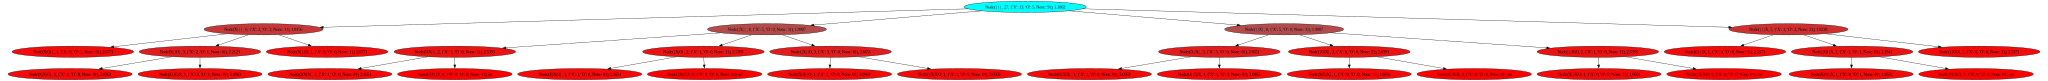

In [15]:
random.seed(0)

root = Node(ConnectTwo(), None)
root.expand()

def rollout(node):
    temp = copy.deepcopy(node.state)
    while not temp.is_game_over():
        temp.make_move(random.choice(temp.valid_moves()))
    return temp.check_winner()

# iterations
for i in range(100):
    current = root

    while current.nodes:
        current = max(current.nodes, key=lambda x: x.UCB1())

    print("Selected", current)

    if current.visits == 0:
        winner = rollout(current)
        current.backpropagate(winner)
    elif not current.state.is_game_over():
        current.expand()
        current = current.nodes[0]
        winner = rollout(current)
        current.backpropagate(winner)
    else:
        print("skipped", i)

# root.print_tree()

draw_tree(root)